In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:

Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
c_list=list(Country_list.values())
years=np.arange(2002, 2020, 1)
df=pd.read_csv(r"C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Migration\scopus_2024_V1_scholarlymigration_countryflows_enriched_new.csv")
df=df[df['year'].isin(years)].reset_index(drop=True)

In [5]:

religion_df=pd.read_csv(r'C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Religion\cleaned_religion.csv')
df=df.merge(religion_df, left_on='iso3codeto', right_on='name_iso')

In [6]:

years_before=np.arange(2002, 2011, 1)
years_after=np.arange(2011, 2020, 1)
world_before=df[df['year'].isin(years_before)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Pre-Arabspring)'})
world_after=df[df['year'].isin(years_after)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Post-Arabspring)'})


target_before=df[(df['year'].isin(years_before))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Pre-Arabspring)'})
target_after=df[(df['year'].isin(years_after))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Post-Arabspring)'})
res=world_after.merge(target_after).merge(world_before).merge(target_before)


In [7]:
for col in res.columns[1:]:
    res[col]/=sum(res[col])
res.index=res.most_religion
del res['most_religion']

res=res.transpose().reset_index()

In [8]:
res

most_religion,index,Buddhism,Christianity,Hindu,Islam,Judaism,Non. Religious,Shinto,Syncretic Religions
0,world(Post-Arabspring),0.019826,0.751171,0.021825,0.085423,0.007324,0.023210,0.024334,0.066887
1,Target(Post-Arabspring),0.003152,0.473531,0.017700,0.461327,0.000889,0.007840,0.021094,0.014467
2,world(Pre-Arabspring),0.016130,0.811044,0.016304,0.051388,0.007478,0.023543,0.035988,0.038127
3,Target(Pre-Arabspring),0.002875,0.598403,0.019968,0.334984,0.000958,0.006390,0.031789,0.004633


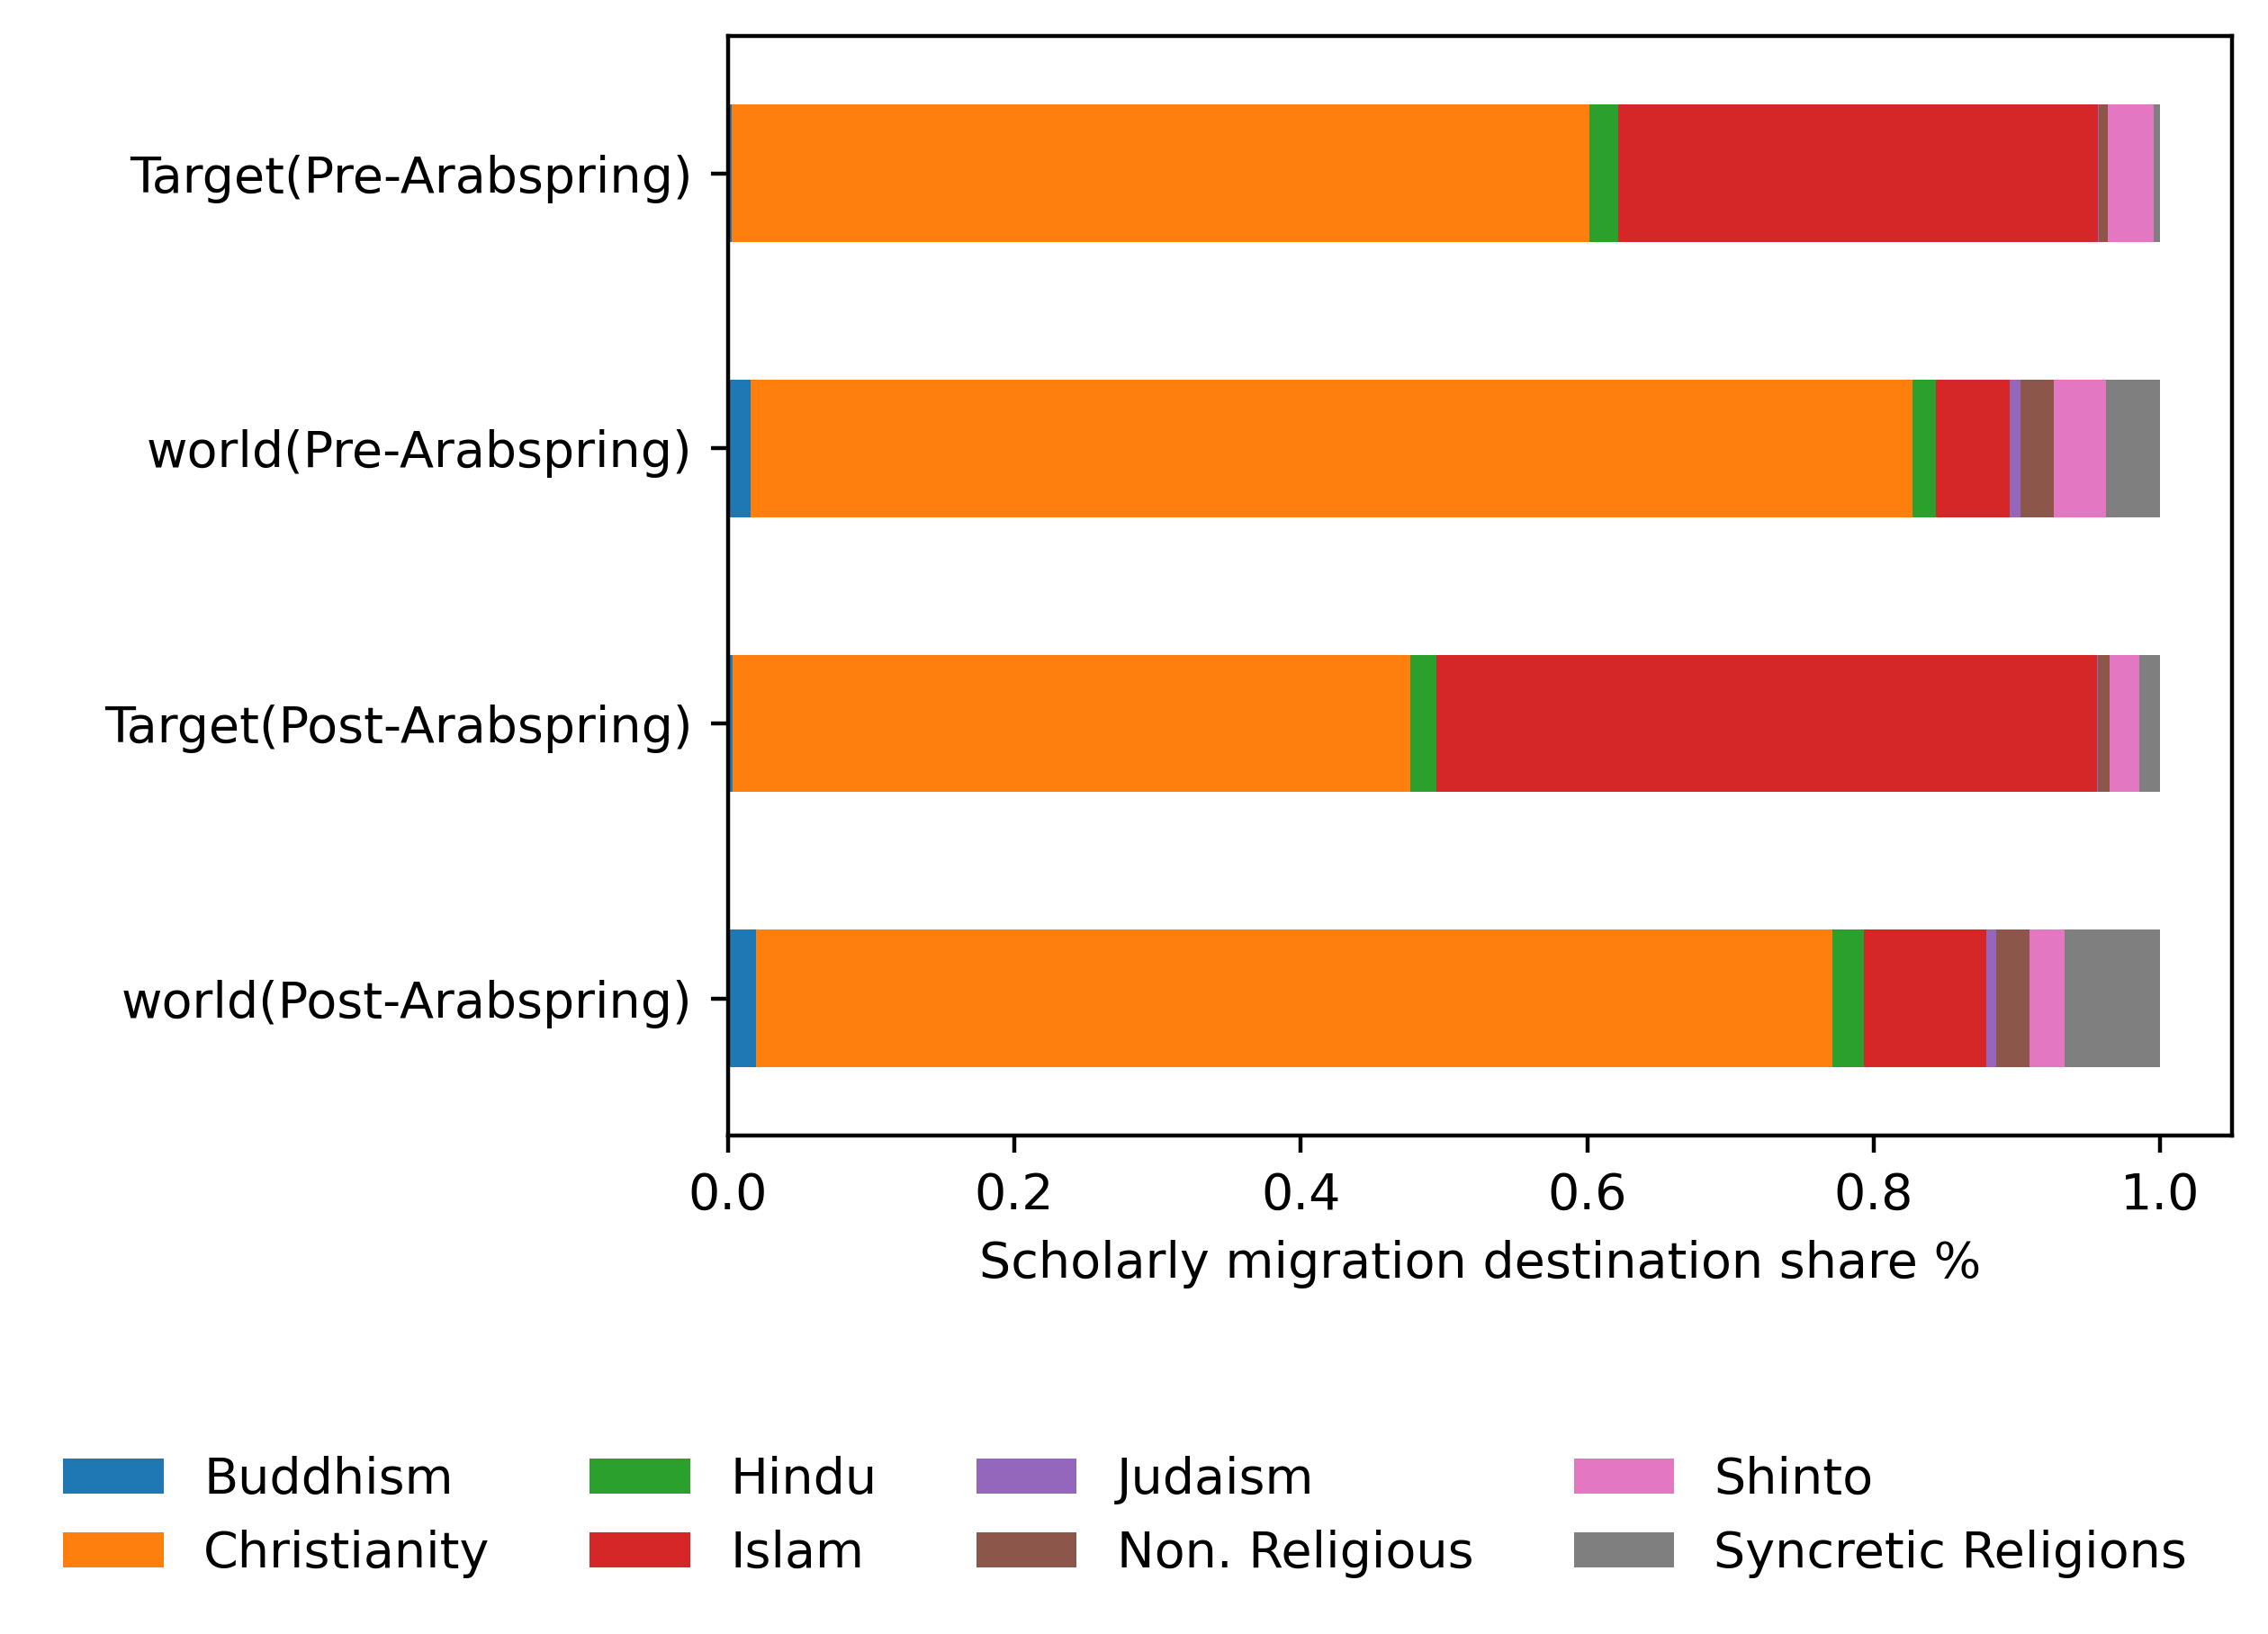

In [11]:
fig, ax=plt.subplots(nrows=1, ncols=1, dpi=400)
res.plot(x='index', kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Scholarly migration destination share %')
ax.set_ylabel(' ')
# Put the legend outside the plot area
lgd=ax.legend( bbox_to_anchor=(1, -.25), ncol=4, frameon=False)
fig.tight_layout()
fig.savefig('Religion_and_migration.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')